(792, 1, 2)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]

----------------------------------------------------------------------------------------------------

Example Area :  61517.0
Example Peri :  926.2051863670349
Example Approx Shape :  (8, 1, 2)
Example Approx :  [[[247 322]]

 [[155 369]]

 [[121 476]]

 [[169 568]]

 [[276 601]]

 [[368 552]]

 [[400 446]]

 [[352 355]]]


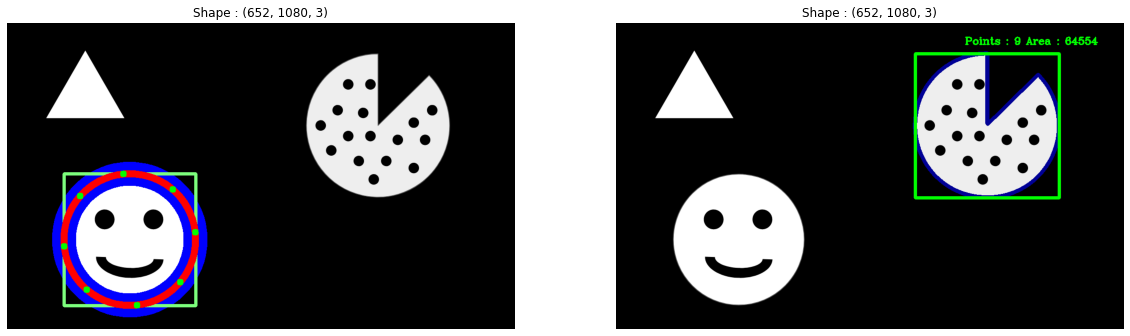

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/Python for Computer Vision with OpenCV and Deep Learning/DATA/internal_external.png"
img = cv2.imread(path)    
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
imgContours = img.copy()

contours,hierarchy = cv2.findContours(imgGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 62000:
        cv2.drawContours(imgContours,cnt,-1,150,7)
        peri = cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt,0.02*peri,True)
        x,y,w,h = cv2.boundingRect(approx)
     
        cv2.rectangle(imgContours,(x,y),(x+w,y+h),(0,255,0),5)
            
        cv2.putText(imgContours,"Points : " + str(len(approx)) + " Area : " + str(int(area)),
                    (x+w-200,y-20), cv2.FONT_HERSHEY_COMPLEX,0.7,(0,255,0),2)

# Tek örnek üzerinden neye yaradıklarını anlamak için !!!

i = 0
test = contours[i]

print(np.array(test).shape) # Bu bir şeklin resimdeki konumları
print()
print(hierarchy)
print()
print("".center(100,"-"))
print()

area_ = cv2.contourArea(test)
cv2.drawContours(img,test,-1,(255,0,0),50)
peri_ = cv2.arcLength(test,True)
approx_ = cv2.approxPolyDP(test,0.02*peri,True)
x_,y_,w_,h_ = cv2.boundingRect(approx_)
cv2.rectangle(img,(x_,y_),(x_+w_,y_+h_),(125,255,125),5)

print("Example Area : ",area_)
print("Example Peri : ",peri_)
print("Example Approx Shape : ",approx_.shape )
print("Example Approx : ",approx_)

for i in test:
    x,y = i[0]
    cv2.circle(img,(int(x),int(y)),2,(0,0,255),10)
    
for i in approx_:
    x,y = i[0]
    cv2.circle(img,(int(x),int(y)),2,(0,255,0),10)

    
plt.figure(figsize = (20,20))
    
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),cmap = "gray")
plt.title(f"Shape : {img.shape}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(imgContours,cv2.COLOR_BGR2RGB),cmap = "gray")
plt.title(f"Shape : {imgContours.shape}")
plt.axis("off")

plt.show()

In [115]:
import cv2
import numpy as np


def convert_img(image):
    return cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

def empty(a):
     pass

frameWidth = 1080
frameHeight = 1080
cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,frameHeight)

cv2.namedWindow("Parameters")
cv2.resizeWindow("Parameters",640,240)
cv2.createTrackbar("Threshold1","Parameters",150,255,empty)
cv2.createTrackbar("Threshold2","Parameters",255,255,empty)
cv2.createTrackbar("Area","Parameters",5000,30000,empty)


def getContours(img,imgCountour):
    contours,hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        areaMin = cv2.getTrackbarPos("Area","Parameters")
        if area > areaMin:
            cv2.drawContours(imgCountour,contours,-1,(255,0,255),7)
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            x,y,w,h = cv2.boundingRect(approx)
            
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),5)
            
            cv2.putText(imgContour,"Points : " + str(len(approx)),(x+w+20,y+20), cv2.FONT_HERSHEY_COMPLEX,0.7, 
                       (0,255,0),2)
            
            cv2.putText(imgContour,"Area : " + str(int(area)),(x+w+20,y+45), cv2.FONT_HERSHEY_COMPLEX,0.7, 
                       (0,255,0),2)

while True:
    
    con, img = cap.read()
    imgContour = img.copy()
    
    imgBlur = cv2.GaussianBlur(img, (7,7), 1)
    imgGray = cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)
    
    threshold1 = cv2.getTrackbarPos("Threshold1","Parameters")
    threshold2 = cv2.getTrackbarPos("Threshold2","Parameters")
    
    imgCanny = cv2.Canny(imgGray,threshold1 , threshold2)
    kernel = np.ones((5,5))
    imgDil = cv2.dilate(imgCanny,kernel,iterations = 1)
    
    getContours(imgDil,imgContour)
    
    hor1 = np.hstack([img,convert_img(imgCanny),convert_img(imgDil)])
    hor2 = np.hstack([imgContour,imgContour,imgContour])
    ver = np.vstack([hor1,hor2])
    
    
    cv2.imshow("Result",cv2.flip(imgContour,1))
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()